In [ ]:
## Introduction

# Understanding emotional patterns through data analysis can provide insights into human behavior, productivity, and mental well-being. Mood tracking datasets help identify dominant emotional states and potential behavioral trends.
# This project performs an exploratory data analysis (EDA) on a mood dataset to:
# - Understand the distribution of different mood categories
# - Identify dominant emotional patterns
# - Analyze frequency variations
# - Extract meaningful insights from the data

# The analysis is conducted using Python and data visualization libraries to ensure reproducibility and transparency.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel('/content/Input.xlsx')

In [ ]:
#Dataset Description

# The dataset contains records of mood categories collected over a specific period.

# Key Features:
# - Mood: Categorical variable representing emotional state
# - (Add other columns if present: Date, Intensity, Activity, etc.)

# Dataset Characteristics:
# - Total Observations: X
# - Data Type: Categorical
# - No. of Unique Mood Categories: 9

# The dataset primarily consists of discrete emotional labels such as Happy, Neutral, Sad, Angry, etc.

In [ ]:
df.head(10)

,Day,Mood,Activity-1,Activity-2
0,Monday,Sad,Work,Heavy Workload
1,Tuesday,Sad,Relationships,Argument
2,Wednesday,Lonely,Routine,Daily Monotony
3,Thursday,Neutral,Routine,Daily Monotony
4,Friday,Happy,Leisure,Friends Gathering
5,Saturday,Rad,Leisure,Friends Gathering
6,Sunday,Neutral,Self-Improvement,Study
7,Monday,Neutral,Work,Heavy Workload
8,Tuesday,Happy,Work,Project Success
9,Wednesday,Lonely,Relationships,Feeling Lonely


In [ ]:
df.isnull().sum()

Day           0
Mood          0
Activity-1    0
Activity-2    0
dtype: int64

In [ ]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 105
Columns  : 4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         105 non-null    object
 1   Mood        105 non-null    object
 2   Activity-1  105 non-null    object
 3   Activity-2  105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


In [ ]:
mood_counts = df['Mood'].value_counts()
mood_counts

Mood
Neutral      33
Happy        30
Lonely       10
Rad           8
Angry         7
Routine       7
Sad           5
Awful         3
Depressed     2
Name: count, dtype: int64

In [ ]:
activity1_counts = df['Activity-1'].value_counts()
activity1_counts

Activity-1
Work                30
Relationships       21
Leisure             17
Routine             10
Self-Improvement     9
Health               9
Events               8
Finance              1
Name: count, dtype: int64

In [ ]:
activity2_counts = df['Activity-2'].value_counts()
activity2_counts

Activity-2
Daily Monotony       16
Relaxing             13
Busy Schedule        11
Study                 9
Pleasant Surprise     9
Feeling Lonely        7
Partner Support       6
Sleep issues          5
Team Conflict         5
Friends Gathering     4
Project Success       4
Argument              4
Recovery Period       3
Heavy Workload        2
Grief                 2
Doctor Visit          1
Fitness Goals         1
Job Promotion         1
Financial Goals       1
Demise                1
Name: count, dtype: int64

In [ ]:
averagemoodbyday = df.groupby('Day')['Mood'].value_counts().groupby(level=0).mean()
averagemoodbyday

Day
Friday       3.000000
Monday       3.000000
Saturday     3.750000
Sunday       3.750000
Thursday     3.000000
Tuesday      2.142857
Wednesday    2.142857
Name: count, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sad'),
  Text(1, 0, 'Lonely'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Happy'),
  Text(4, 0, 'Rad'),
  Text(5, 0, 'Angry'),
  Text(6, 0, 'Routine'),
  Text(7, 0, 'Awful'),
  Text(8, 0, 'Depressed')])

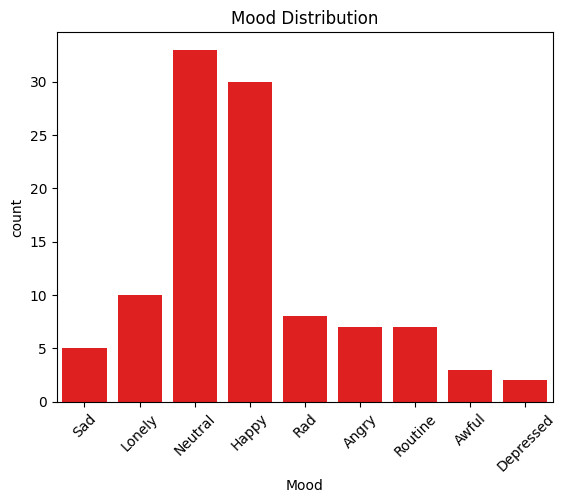

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='Mood', data=df, color='red')
plt.title('Mood Distribution')
plt.xticks(rotation=45)
plt.figure(figsize=(15, 6))

In [ ]:
# Insights

# 1. Neutral mood has the highest frequency, suggesting emotional stability across the dataset.
# 2. Positive emotions (Happy) significantly outnumber strongly negative states (Depressed, Awful).
# 3. Emotional distribution shows moderate imbalance, with mid-spectrum emotions dominating.
# 4. Rare occurrence of extreme moods may indicate reporting bias or sampling limitation.

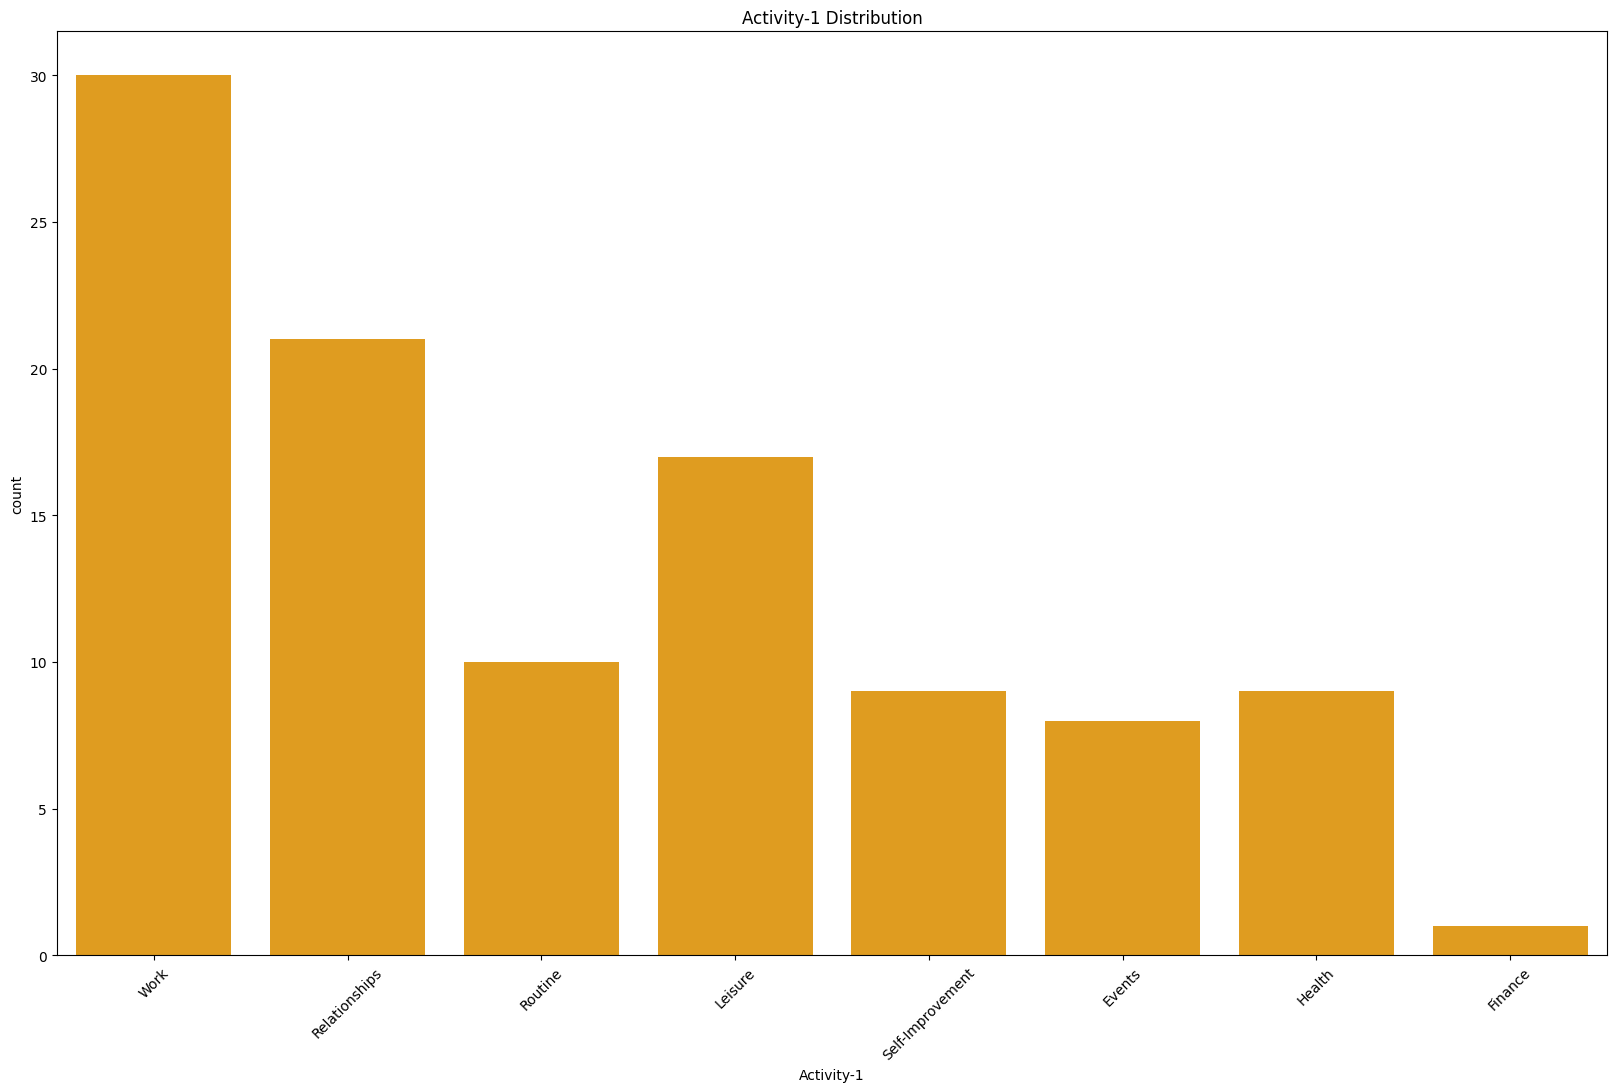

In [ ]:
fig, axes = plt.subplots(figsize=(20, 12))
sns.countplot(x='Activity-1', data=df, color='orange')
plt.xticks(rotation=45)
plt.title('Activity-1 Distribution')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

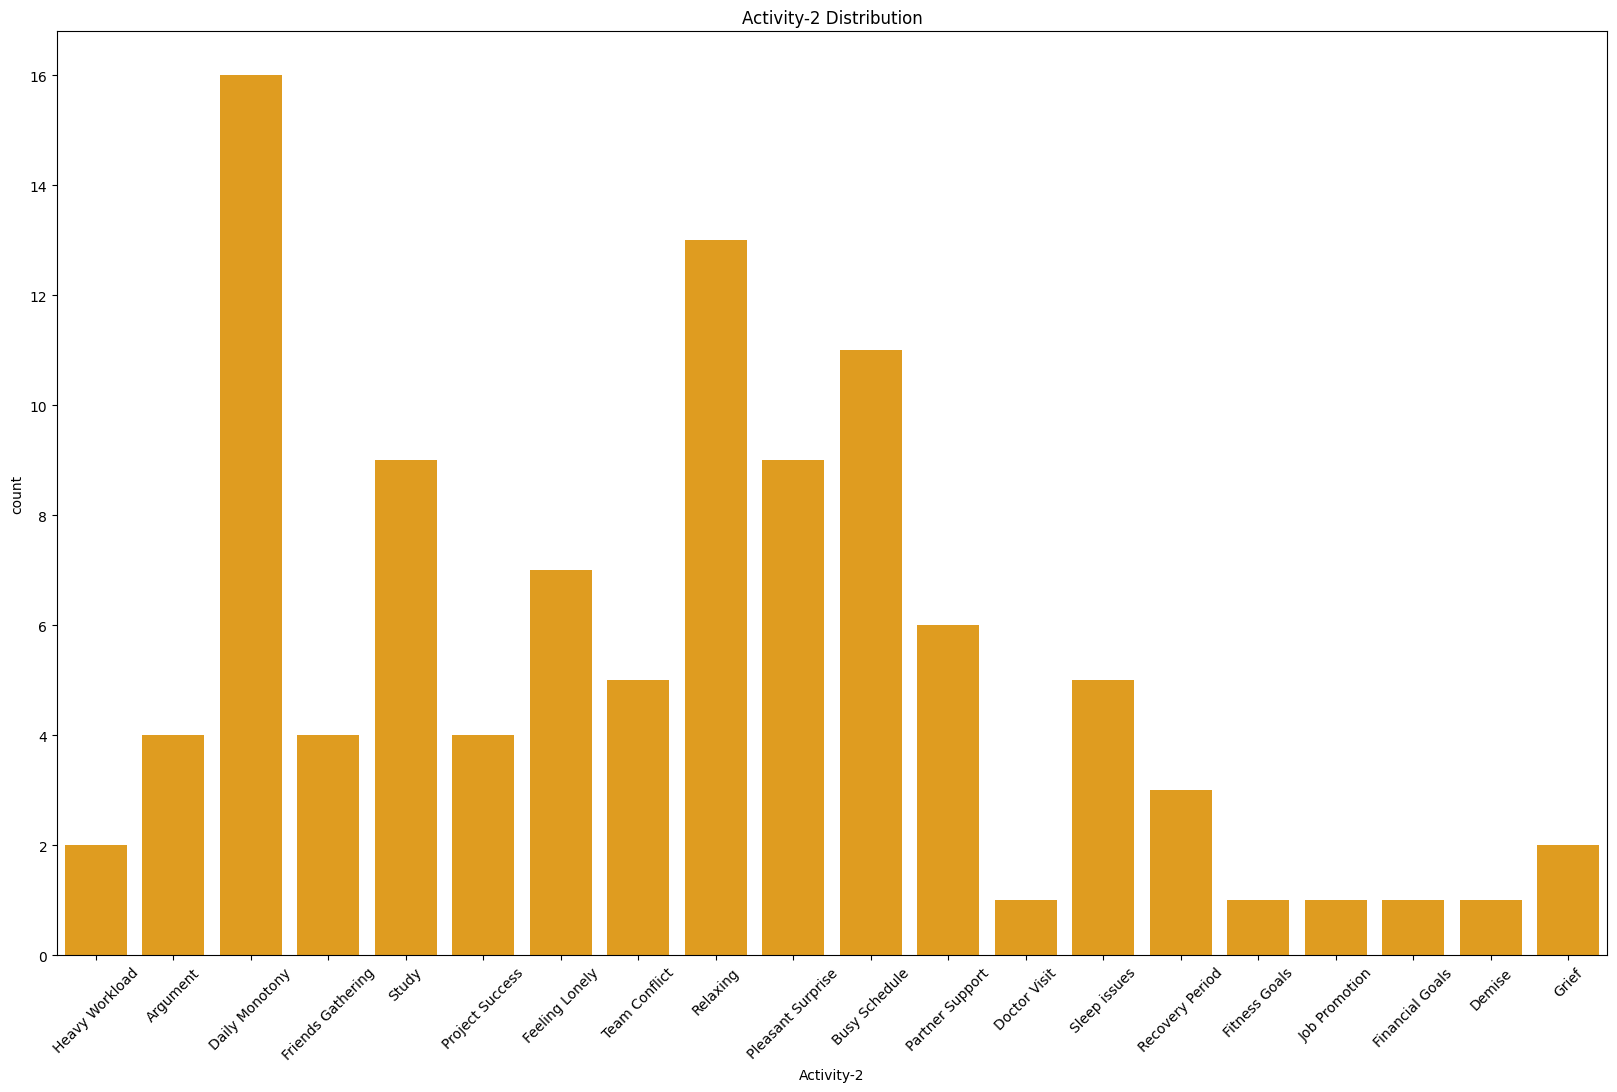

In [ ]:
fig, axes = plt.subplots(figsize=(20, 12))
sns.countplot(x='Activity-2', data=df, color='orange')
plt.xticks(rotation=45)
plt.title('Activity-2 Distribution')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

Text(0.5, 1.0, 'Average Mood by Day')

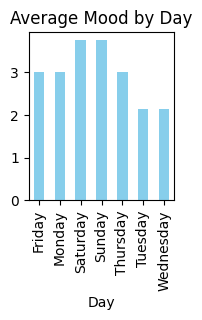

In [ ]:
plt.subplot(2, 3, 3)
averagemoodbyday.plot(kind='bar', color='skyblue')
plt.title('Average Mood by Day')

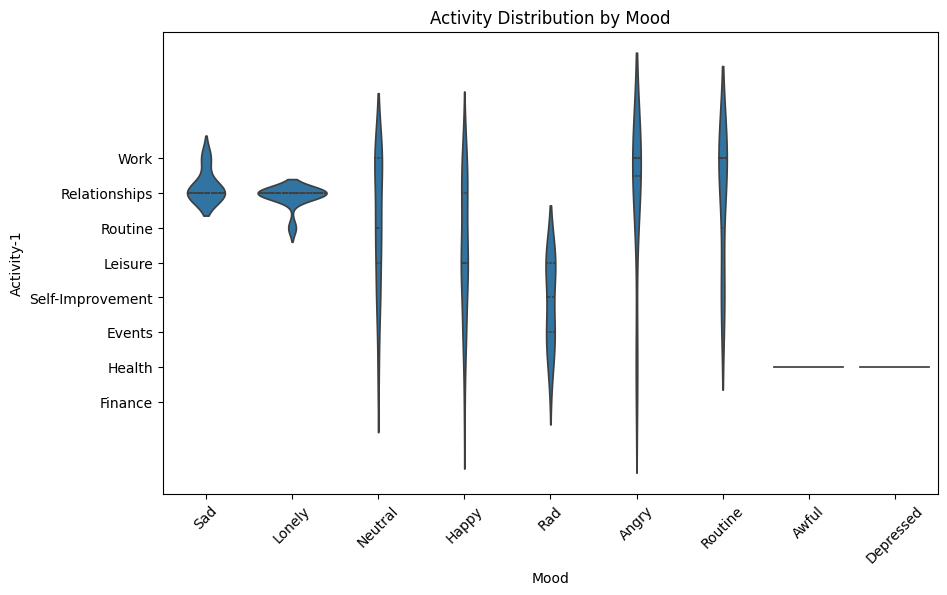

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mood', y='Activity-1', data=df, inner='quartile')
plt.title('Activity Distribution by Mood')
plt.xlabel('Mood')
plt.ylabel('Activity-1')
plt.xticks(rotation=45)
plt.show()


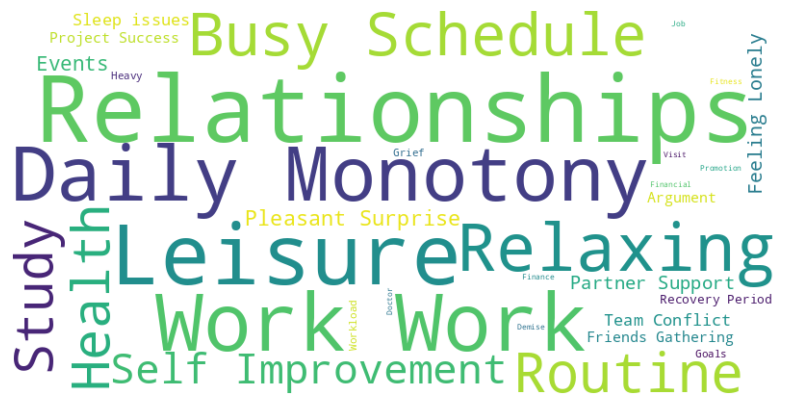

In [ ]:
from wordcloud import WordCloud
text_data = ' '.join(df['Activity-1']) + ' ' + ' '.join(df['Activity-2'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
